In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,recall_score,log_loss
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.impute import KNNImputer

In [3]:
train = pd.read_csv('/machine_hack/Flower_Classification/train.csv')
test = pd.read_csv('/machine_hack/Flower_Classification/test.csv')
sub = pd.read_csv('/machine_hack/Flower_Classification/Sample_Submission.csv')

In [4]:
train.head(5)

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species
0,4694,17,1609,3.0,5.0,7,48
1,781,7,1380,4.0,17.0,2,54
2,21014,6,1122,3.0,11.0,1,22
3,7326,6,556,3.0,34.0,7,25
4,13122,17,1752,5.0,16.0,2,128


In [5]:
train.isnull().sum()

Area_Code        0
Locality_Code    0
Region_Code      0
Height           0
Diameter         0
Class            0
Species          0
dtype: int64

In [6]:
train.dtypes

Area_Code          int64
Locality_Code      int64
Region_Code        int64
Height           float64
Diameter         float64
Class              int64
Species            int64
dtype: object

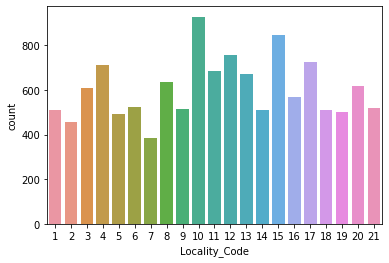

In [7]:
sns.countplot('Locality_Code',data=train)

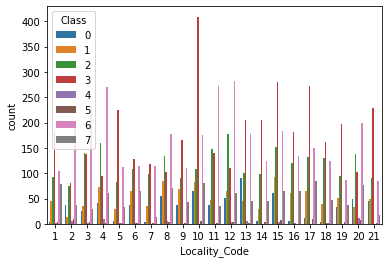

In [8]:
sns.countplot('Locality_Code',hue='Class',data=train)

In [9]:
train.Area_Code.var()

90816646.8531223

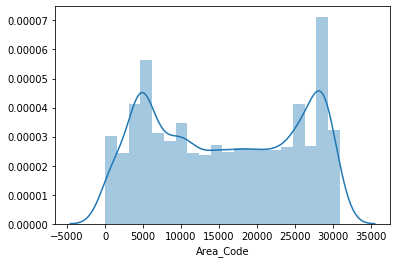

In [10]:
sns.distplot(train.Area_Code)

In [11]:
train.Region_Code.nunique(), train.Region_Code.var()

(1870, 397346.8164346148)

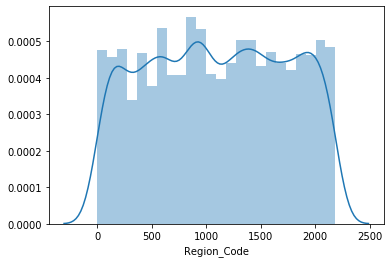

In [12]:
sns.distplot(train.Region_Code)

In [15]:
def getCode(region,locality):
    return region.astype(str)+locality.astype(str)

In [16]:
code = getCode(train.Region_Code,train.Locality_Code)

In [17]:
train['Code'] = code

In [18]:
train.head(5)

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species,Code
0,4694,17,1609,3.0,5.0,7,48,160917
1,781,7,1380,4.0,17.0,2,54,13807
2,21014,6,1122,3.0,11.0,1,22,11226
3,7326,6,556,3.0,34.0,7,25,5566
4,13122,17,1752,5.0,16.0,2,128,175217


In [23]:
def getHyp(h,d):
    return np.sqrt(np.square(h)+np.square(d/2))

In [24]:
hyp = getHyp(train.Height,train.Diameter)

In [25]:
train['hyp'] = hyp

In [26]:
train.head(5)

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species,Code,hyp
0,4694,17,1609,3.0,5.0,7,48,160917,3.905125
1,781,7,1380,4.0,17.0,2,54,13807,9.394147
2,21014,6,1122,3.0,11.0,1,22,11226,6.264982
3,7326,6,556,3.0,34.0,7,25,5566,17.262677
4,13122,17,1752,5.0,16.0,2,128,175217,9.433981


In [27]:
X = train.drop(['Class'],axis=1)
y = train.Class

In [28]:
test.head(5)

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Species
0,25836,4,903,7.5,8.0,14
1,28544,14,1576,3.0,7.0,48
2,7037,11,350,15.0,57.0,56
3,20460,17,1208,3.0,6.0,180
4,17555,14,994,4.5,22.0,225


In [29]:
test.isnull().sum()

Area_Code        0
Locality_Code    0
Region_Code      0
Height           0
Diameter         0
Species          0
dtype: int64

In [31]:
test['Code'] = getCode(test.Region_Code,test.Locality_Code)

In [32]:
test['hyp'] = getHyp(test.Height,test.Diameter)

In [33]:
test.head(5)

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Species,Code,hyp
0,25836,4,903,7.5,8.0,14,9034,8.500000
1,28544,14,1576,3.0,7.0,48,157614,4.609772
2,7037,11,350,15.0,57.0,56,35011,32.206366
3,20460,17,1208,3.0,6.0,180,120817,4.242641
4,17555,14,994,4.5,22.0,225,99414,11.884864


In [34]:
X_train , X_test , y_train , y_test = train_test_split(X.values , y.values , test_size = 0.3 , random_state = 42
                                                    )

In [35]:
from xgboost import XGBClassifier

In [36]:
random_state = 2
classifiers = []
#classifiers.append((SVC(random_state=random_state)))
#classifiers.append((DecisionTreeClassifier(random_state=random_state)))
classifiers.append((AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)))
classifiers.append((RandomForestClassifier(random_state=random_state)))
classifiers.append((ExtraTreesClassifier(random_state=random_state)))
classifiers.append((GradientBoostingClassifier(random_state=random_state)))
classifiers.append((XGBClassifier(random_state=random_state)))

In [37]:
kfold = StratifiedKFold(n_splits=10)

In [38]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y_train , scoring = 'neg_log_loss', cv = kfold, n_jobs=4))


In [39]:
cv_results

[array([-8.31538892, -7.92267269, -8.50297235, -9.03252361, -8.71187724,
        -9.12016516, -7.51573939, -6.90701027, -6.96480374, -7.11537932]),
 array([-2.54655347, -2.75880312, -2.6738525 , -2.89779967, -2.80153082,
        -3.11720829, -2.53809403, -2.79037065, -2.7676045 , -2.79245489]),
 array([-2.98860656, -2.80191354, -2.74139848, -2.9285552 , -2.84804064,
        -3.00658618, -2.8670949 , -3.09330678, -2.82549613, -2.66959403]),
 array([-0.91235506, -0.89374674, -0.88450856, -0.88954733, -0.89691099,
        -0.88639808, -0.81570356, -0.92181449, -0.87177182, -0.85929924]),
 array([-0.8308744 , -0.86282424, -0.85719441, -0.90513329, -0.85659287,
        -0.84965946, -0.79845417, -0.8776775 , -0.83523892, -0.8493492 ])]

In [40]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [41]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","XGBoost"]})

In [42]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,-8.010853,0.804252,AdaBoost
1,-2.768427,0.158701,RandomForest
2,-2.877059,0.122200,ExtraTrees
3,-0.883206,0.028196,GradientBoosting
4,-0.852300,0.026933,XGBoost


In [63]:
xg = XGBClassifier(n_estimators=200,max_depth=8,gamma=2,colsample_bytree=0.7,subsample=1,reg_lambda=1,
                   min_child_weight=1,learning_rate=0.33,max_delta_step=1,sampling_method='uniform',random_state=42
                  )
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.33, max_delta_step=1, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, sampling_method='uniform', scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [64]:
cross_val_score(xg,X_train,y_train,scoring='neg_log_loss',cv=kfold)

array([-0.78761668, -0.81322912, -0.80660431, -0.84198216, -0.83143661,
       -0.8072616 , -0.75865601, -0.82741871, -0.79725487, -0.79016204])

In [35]:
p = xg.predict(test.values)

In [38]:
d = pd.get_dummies(p)

In [36]:
sub.head(5)

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
sub.loc[:,:] = d.values

In [43]:
sub.head(5)

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0


In [44]:
sub.to_csv('Sub1.csv',index=False)